## Unbalanced Gromov-Wasserstein for SNARE-seq example

To simulate imbalance between cell types, we subsample the ATAC dataset and try to align to the full RNA dataset.

First import the data:

In [ ]:
import numpy as np
from sklearn.preprocessing import normalize
#load the data:
Xrna=normalize(np.load("../data/SNARE/SNAREseq_rna_feat.npy"))
Yatac=normalize(np.load("../data/SNARE/SNAREseq_atac_feat.npy"))
print("Dimensions of input datasets are: ", "X(rna)= ", Xrna.shape, " Y(atac)= ", Yatac.shape)

Visualize the distribution of cell-types:

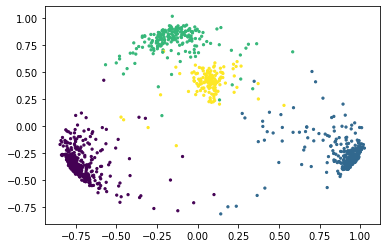

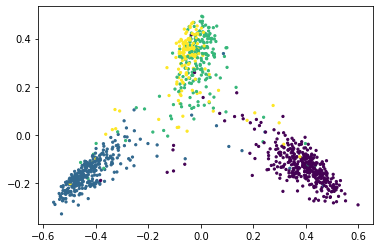

In [2]:
Xrna_ctypes=np.loadtxt("../data/SNARE/SNAREseq_rna_types.txt").astype(int)
Yatac_ctypes=np.loadtxt("../data/SNARE/SNAREseq_atac_types.txt").astype(int)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
pca=PCA(n_components=2)
Xrna_2Dpca=pca.fit_transform(Xrna)
Yatac_2Dpca=pca.fit_transform(Yatac)

plt.scatter(Xrna_2Dpca[:,0], Xrna_2Dpca[:,1], s=5, c=Xrna_ctypes)
plt.show()
plt.scatter(Yatac_2Dpca[:,0], Yatac_2Dpca[:,1], s=5, c=Yatac_ctypes)
plt.show()

Randomly subsample different cell types in the ATAC domain for the "unbalanced" experiment

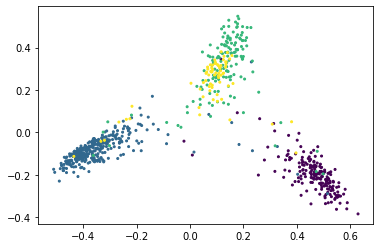

In [3]:
props = [0.5, 1, 0.75, 0.5]

index = np.concatenate([np.where(Yatac_ctypes == i)[0][0:int((Yatac_ctypes == i).sum() * props[i-1])] for i in range(1,len(props)+1)])
Yatac_subsamp = Yatac[index, :]

Yatac_subsamp_2Dpca = pca.fit_transform(Yatac_subsamp)
plt.scatter(Yatac_subsamp_2Dpca[:, 0], Yatac_subsamp_2Dpca[:, 1], s = 4, c = Yatac_ctypes[index])

### Now run SCOT and SCOTv2 to align the RNA domain with the subsampled ATAC domain

First running SCOTv1:

In [6]:
import scotv1
SCOTv1=scotv1.SCOT(Xrna, Yatac_subsamp)
Xrna_aligned, Yatac_sumsamp_aligned=SCOTv1.align(k=50, e=1e-3, normalize=False, XontoY=False)

It.  |Err         
-------------------
    0|2.041784e-03|
   10|6.574496e-04|
   20|2.153045e-04|
   30|2.176224e-04|
   40|1.334470e-04|
   50|9.551809e-05|
   60|6.256376e-05|
   70|3.731755e-05|
   80|2.184968e-05|
   90|1.327636e-05|
  100|8.392663e-06|
  110|5.458488e-06|
  120|3.620305e-06|
  130|2.433857e-06|
  140|1.651641e-06|
  150|1.128118e-06|
  160|7.740041e-07|
  170|5.326980e-07|
  180|3.674112e-07|
  190|2.537873e-07|
It.  |Err         
-------------------
  200|1.754829e-07|
  210|1.214254e-07|
  220|8.406185e-08|
  230|5.821529e-08|
  240|4.032536e-08|
  250|2.793771e-08|
  260|1.935766e-08|
  270|1.341372e-08|
  280|9.295427e-09|
  290|6.441781e-09|
  300|4.464306e-09|
  310|3.093925e-09|
  320|2.144229e-09|
  330|1.486060e-09|
  340|1.029922e-09|
  350|7.137957e-10|


ValueError: operands could not be broadcast together with shapes (1047,19) (734,1) 

In [10]:
coupling=SCOTv1.coupling
print(coupling.shape, Xrna.shape, Yatac_subsamp.shape)

(1047, 734) (1047, 10) (734, 19)


In [ ]:
#run PCA jointly:
concatenated=np.concatenate((Xrna_aligned,Yatac_sumsamp_aligned), axis=0)
concatenated_pc=pca.fit_transform(concatenated)
Xrna_aligned_pc=concatenated_pc[0:Xrna_aligned.shape[0],:]
Yatac_subsamp_integrated_pc=concatenated_pc[Xrna_integrated.shape[0]:,:]

print(Xrna_integrated.shape, Yatac_subsamp_integrated.shape)
print(Xrna_integrated_pc.shape, Yatac_subsamp_integrated_pc.shape)

plt.scatter(Xrna_integrated_pc[:,0], Xrna_integrated_pc[:,1], s=5, c=Xrna_ctypes)
plt.show()
plt.scatter(Yatac_subsamp_integrated_pc[:,0], Yatac_subsamp_integrated_pc[:,1], s=5, c=Yatac_ctypes[index])
plt.show()